# Project 1 with Linear Regression

## Problem Statement

We need to predict the chance of admission based on the various competitive exam scores of students

Features or Independent variables

GRE score 
TOEFL score 
University rating 
SOP 
LOR 
CGPA 
Research 
 
Label/Target

Chance of Admit

Always refer sklearn official documentation if you are not sure about syntax or parameter

https://scikit-learn.org




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as sm
import statsmodels.api as k

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [3]:
data = pd.read_csv('Admission_Prediction.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [4]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [5]:
#Dropping unwanted columns

data.drop(columns='Serial No.',inplace = True)

In [ ]:
data.head()

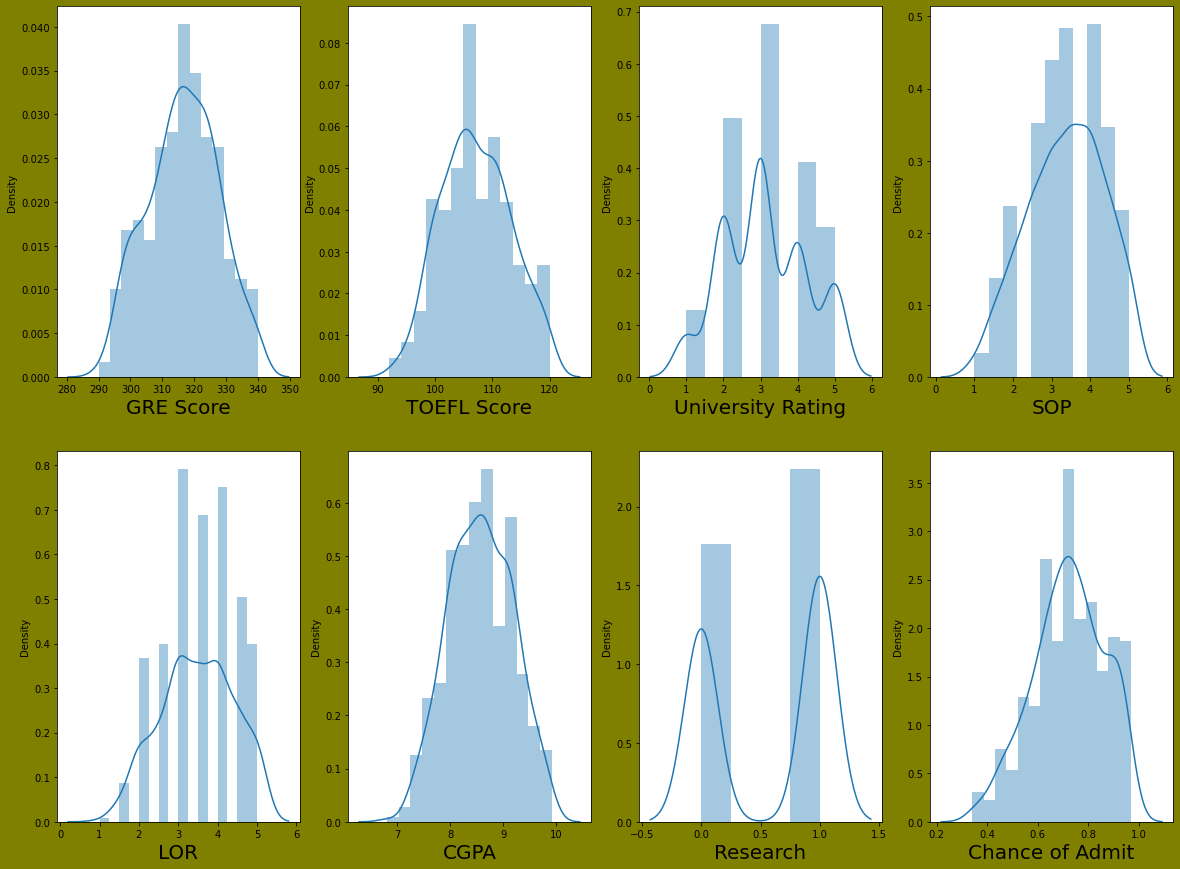

In [6]:
# Lets see how data is distributed for each column. Linear Regression model is built on the assumption that data is
#distributed normally.

plt.figure(figsize=(20,15),facecolor='olive')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great lets go ahead.

Lets observe the relationship between independent and dependent variables.

In [7]:
# Divide dataset into features and label

X = data.drop(columns = 'Chance of Admit')
y = data['Chance of Admit']

In [ ]:
X

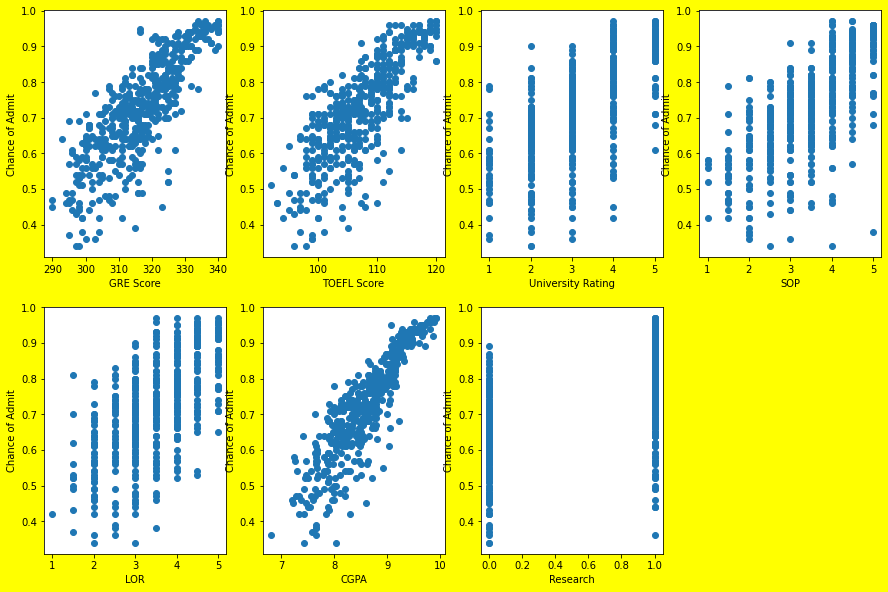

In [8]:
# Visualizing relationship

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber+=1
plt.show()

Great, the relationship between depndent and independent variables looks fairly linear.Thus our linearity assumption is satisfied. Lets go ahead and use linear regression and see how good it fits our data but lets first split our data into train and test

In [9]:
# Data Scaling Formula: Z= (x-mu)/std

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [10]:
# Train and test split. Model will be built on training data and tested on test data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=256)

y_train.head()



210    0.79
300    0.62
164    0.81
460    0.77
461    0.68
Name: Chance of Admit, dtype: float64

# Model initialization and training

In [11]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
data.tail(2)


# Prediction of data

In [12]:
print("Chance of Admission : ", regression.predict(scaler.transform([[327,113,4,4.5,4.5,9.04,0]])))

Chance of Admission :  [0.82799132]


In [13]:
# Saving the model to local file system

pickle.dump(regression,open('reg_model','wb'))

In [14]:
# prediction using the saved model

loaded_model = pickle.load(open('reg_model','rb'))

a=loaded_model.predict(scaler.transform([[327,113,4,4.5,4.5,9.04,0]]))

a

array([0.82799132])

# Model confidence on train and test data

In [15]:
# Adjusted R2 score

regression.score(x_train,y_train)

0.8247625926589752

In [16]:
# Adjusted R2 score

regression.score(x_test,y_test)

0.7995183753831332

# Lets plot and visualize

In [17]:
y_pred = regression.predict(x_test)

y_pred

array([0.67419346, 0.99897069, 0.58697038, 0.55523487, 0.67083417,
       0.58448631, 0.93208525, 0.80375063, 0.53847173, 0.51472499,
       0.70778506, 0.80831695, 0.76709235, 0.68921284, 0.76118881,
       0.65270332, 0.72534523, 0.46716103, 0.82693606, 0.74958513,
       0.72917122, 0.83575112, 0.7702788 , 0.59283528, 0.54562002,
       0.67275389, 0.93839264, 0.78510283, 0.74340796, 0.65717907,
       0.74868455, 0.77504197, 0.85717932, 0.7783695 , 0.77154629,
       0.57349264, 0.75373831, 0.72924895, 0.88934983, 0.75126006,
       0.98880047, 0.64946308, 0.79512736, 0.77112105, 0.88839433,
       0.71671641, 0.91634187, 0.7081098 , 0.58639149, 0.86205133,
       0.60873447, 0.7647658 , 0.55154161, 0.69592886, 0.68696271,
       0.61304077, 0.70600447, 0.70489841, 0.70235203, 0.77143623,
       0.86187526, 0.48961098, 0.64718347, 0.5500323 , 0.74426904,
       0.59765455, 0.58399864, 0.61007421, 0.42317527, 0.69942253,
       0.76968527, 0.90652861, 0.5270356 , 0.52509177, 0.65290

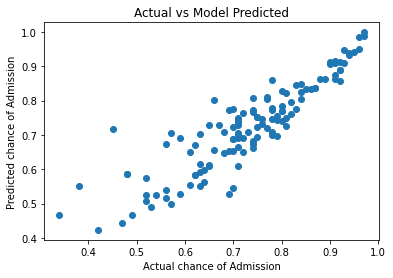

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual chance of Admission",fontsize=10)
plt.ylabel("Predicted chance of Admission",fontsize=10)
plt.title("Actual vs Model Predicted")
plt.show()

# Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
y_pred = regression.predict(x_test)

In [21]:
# MAE - represents avarage error

mean_absolute_error(y_test,y_pred)

0.045131632096628516

In [22]:
# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mean_squared_error(y_test,y_pred)

0.0036833266754873256

In [23]:
# RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.060690416669251214

# You have successfully completed building Linear Regression Model

# LASSO Regularization

In [25]:
#LassoCV will return best alpha after max iteration
#Normalize is subtracting the mean and dividing by the L2 norm
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [26]:
#Best alpha parameter
alpha = lasscv.alpha_
alpha

6.518326770711306e-06

In [27]:
lasso_reg =Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.518326770711306e-06)

In [28]:
lasso_reg.score(x_test,y_test)

0.7995231975388767

# Ridge Regularization

In [29]:
ridgecv = RidgeCV(alphas= np.arange(.001,0.1,.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [30]:
alpha = ridgecv.alpha_
alpha

0.011

In [31]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.011)

In [32]:
ridge_reg.score(x_test,y_test)

0.7995199272073705

We got around same R2 score using Lasso and ridge regression. So it's safe to say that there is no overfitting.